In [92]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer

In [93]:

def load_data(path:str):
    """
    Load the dataset from the given path.

    Parameters:
    path (str): The file path to the dataset.

    Returns:
    pd.DataFrame: The loaded dataset as a pandas DataFrame.
    """
    return pd.read_csv(path)


In [94]:
data=load_data("train.csv")

In [95]:

# Drop ids columns
data=data.drop(['Item_Store_ID', 'Item_ID', 'Store_ID'], axis=1)
data.head()

,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


## Create profile report of the dataset for the EDA(Exploratory Data Analysis) and save it as pdf file (We have in this report informations about missing, values correlation, features distribution  and so on) all information about EDA


In [96]:
!pip install ydata-profiling

In [97]:
from ydata_profiling import ProfileReport

In [98]:
profile=ProfileReport(data,title="Profiling Report")

In [99]:
profile.to_file("profiling_report.pdf")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:00<00:00, 33.11it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ydata_profiling/profile_report.py:386: UserWarning: Extension .pdf not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

More explarations in order to understand really data perform imputation and encoding correctly based on consistency test too

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_Weight          4188 non-null   float64
 1   Item_Sugar_Content   4990 non-null   object 
 2   Item_Visibility      4990 non-null   float64
 3   Item_Type            4990 non-null   object 
 4   Item_Price           4990 non-null   float64
 5   Store_Start_Year     4990 non-null   int64  
 6   Store_Size           3540 non-null   object 
 7   Store_Location_Type  4990 non-null   object 
 8   Store_Type           4990 non-null   object 
 9   Item_Store_Returns   4990 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 390.0+ KB


<Axes: >

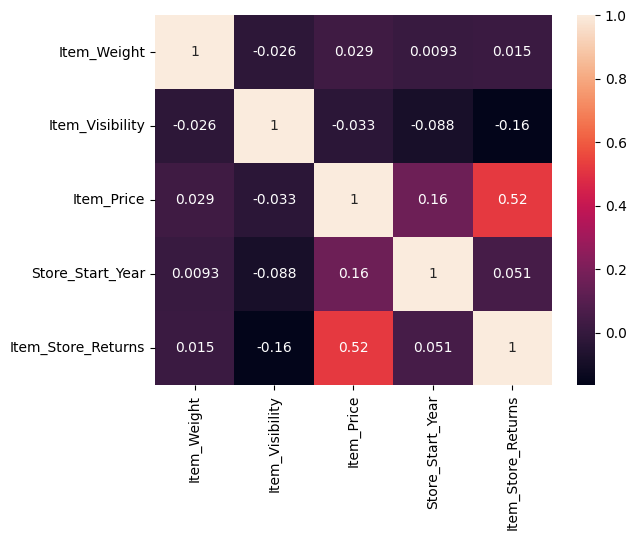

In [101]:
import seaborn as sns
sns.heatmap(data.select_dtypes(exclude="object").corr(),annot=True)

In [102]:
data.describe()

,Item_Weight,Item_Visibility,Item_Price,Store_Start_Year,Item_Store_Returns
count,4188.000000,4990.000000,4990.000000,4990.000000,4990.000000
mean,12.908838,0.066916,391.803796,2004.783567,6103.520164
std,4.703256,0.053058,119.378259,8.283151,4447.333835
min,4.555000,0.000000,78.730000,1992.000000,83.230000
25%,8.767500,0.027273,307.890000,1994.000000,2757.660000
50%,12.600000,0.053564,393.860000,2006.000000,5374.675000
75%,17.100000,0.095358,465.067500,2011.000000,8522.240000
max,21.350000,0.328391,667.220000,2016.000000,32717.410000


In [103]:
data.describe(include="object")

,Item_Sugar_Content,Item_Type,Store_Size,Store_Location_Type,Store_Type
count,4990,4990,3540,4990,4990
unique,3,16,3,3,4
top,Low Sugar,Snack Foods,Medium,Cluster 3,Supermarket Type1
freq,3039,758,1582,1940,3304


Item_Sugar_Content

In [104]:
data['Item_Sugar_Content'].value_counts()

,count
Item_Sugar_Content,
Low Sugar,3039
Normal Sugar,1773
Ultra Low Sugar,178


In [105]:
#map item_sugar_content colun on cardinal values
ordinal_encoder=OrdinalEncoder(categories=[["Low Sugar","Normal Sugar","Ultra Low Sugar"]])

# Reshape the Series to a 2D array before applying the encoder
data["Item_Sugar_Content"] = ordinal_encoder.fit_transform(data['Item_Sugar_Content'].values.reshape(-1, 1))
data["Item_Sugar_Content"].astype('int')

,Item_Sugar_Content
0,0
1,0
2,0
3,0
4,2
...,...
4985,0
4986,0
4987,0
4988,0


Store size contains missing coloumns
Explorons en profonduer ces valeurs et ces relations avec ces colonnes correlé dans le profile Report

test de coherence

In [106]:
data["Store_Size"].value_counts()

,count
Store_Size,
Medium,1582
Small,1364
High,594


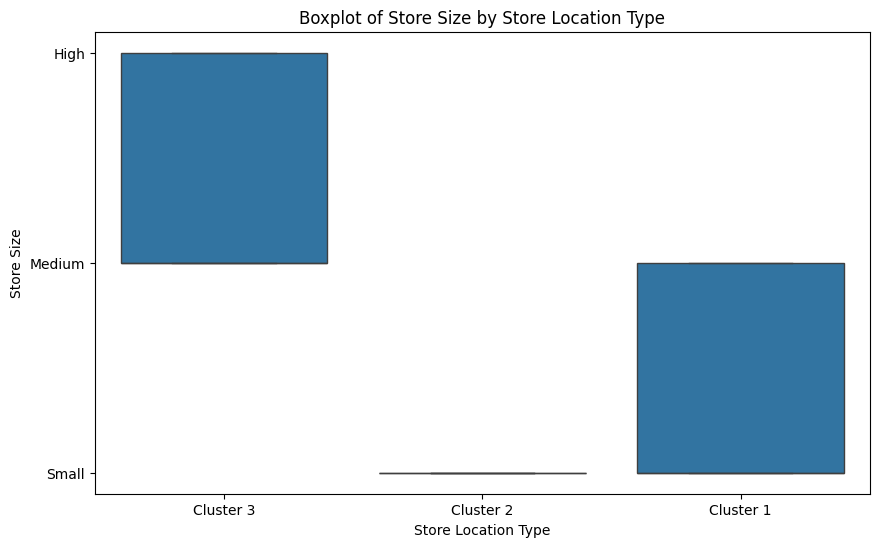

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x="Store_Location_Type", y="Store_Size", data=data)
plt.title("Boxplot of Store Size by Store Location Type")
plt.xlabel("Store Location Type")
plt.ylabel("Store Size")
plt.show()

In [108]:
pd.crosstab(data['Store_Location_Type'], data['Store_Size'], normalize='index') * 100

Store_Size,High,Medium,Small
Store_Location_Type,,,
Cluster 1,0.000000,42.205582,57.794418
Cluster 2,0.000000,0.000000,100.000000
Cluster 3,38.174807,61.825193,0.000000


In [109]:
data["Store_Size"].value_counts()

,count
Store_Size,
Medium,1582
Small,1364
High,594


In [110]:
data.isna().sum()

,0
Item_Weight,802
Item_Sugar_Content,0
Item_Visibility,0
Item_Type,0
Item_Price,0
Store_Start_Year,0
Store_Size,1450
Store_Location_Type,0
Store_Type,0
Item_Store_Returns,0


In [111]:
# Imputer "Small" uniquement là où Store_Size est manquant et Cluster == Cluster 2
data.loc[(data['Store_Location_Type'] == 'Cluster 2') & (data['Store_Size'].isna()), 'Store_Size'] = 'Small'


In [112]:
data.isna().sum()

,0
Item_Weight,802
Item_Sugar_Content,0
Item_Visibility,0
Item_Type,0
Item_Price,0
Store_Start_Year,0
Store_Size,384
Store_Location_Type,0
Store_Type,0
Item_Store_Returns,0


In [113]:
df=data

In [114]:
# Dictionnaire des valeurs majoritaires à imputer
store_size_majoritaire = {
    'Cluster 1': 'Small',

    'Cluster 3': 'Medium'
}

# Remplacer les NaN dans Store_Size par la valeur majoritaire de leur cluster
data['Store_Size'] = data.apply(
    lambda row: store_size_majoritaire[row['Store_Location_Type']] if pd.isna(row['Store_Size']) else row['Store_Size'],
    axis=1
)


WE can impute Store Size missings values based on the ralation between this column and Store LOcation column that we explored previously

In [115]:
data.isna().sum()

,0
Item_Weight,802
Item_Sugar_Content,0
Item_Visibility,0
Item_Type,0
Item_Price,0
Store_Start_Year,0
Store_Size,0
Store_Location_Type,0
Store_Type,0
Item_Store_Returns,0


In [116]:
df.groupby('Store_Size')['Item_Weight'].mean()

,Item_Weight
Store_Size,
High,12.810168
Medium,12.939678
Small,12.914689


In [117]:
print(df.groupby('Store_Size')['Item_Weight'].describe())


             count       mean       std    min     25%    50%    75%    max
Store_Size                                                                 
High         594.0  12.810168  4.686495  4.555  8.6475  12.50  16.85  21.25
Medium      1504.0  12.939678  4.719715  4.555  8.7850  12.50  17.20  21.35
Small       2090.0  12.914689  4.698020  4.555  8.7700  12.65  17.10  21.35


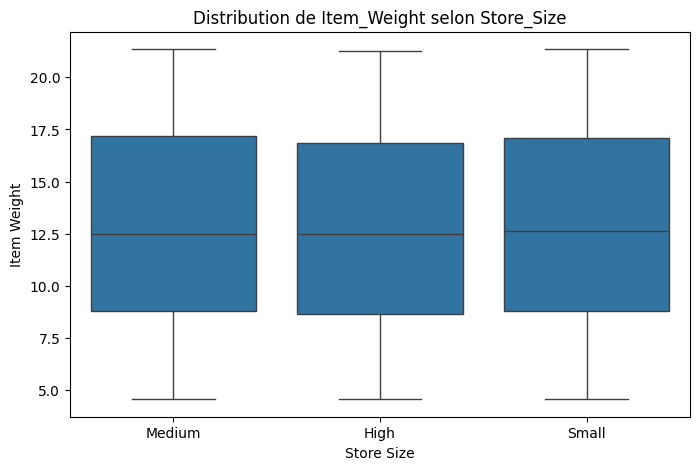

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='Store_Size', y='Item_Weight', data=df)
plt.title("Distribution de Item_Weight selon Store_Size")
plt.xlabel("Store Size")
plt.ylabel("Item Weight")
plt.show()


Encoding Object COlumns

We can't impute Item_weight baset in his relation with others columns corelated

In [119]:


# map item_sugar_content colun on cardinal values
ordinal_encoder=OrdinalEncoder(categories=[["Small","Medium","High"]])

# Reshape the Series to a 2D array before applying the encoder
data["Store_Size"] = ordinal_encoder.fit_transform(data["Store_Size"].values.reshape(-1, 1))
data["Store_Size"] = data["Store_Size"].astype('int')

In [120]:
data.describe(include="object")

,Item_Type,Store_Location_Type,Store_Type
count,4990,4990,4990
unique,16,3,4
top,Snack Foods,Cluster 3,Supermarket Type1
freq,758,1940,3304


In [121]:
data["Store_Location_Type"].value_counts()

,count
Store_Location_Type,
Cluster 3,1940
Cluster 2,1581
Cluster 1,1469


In [122]:


# Initialize OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False) # Set sparse_output to False to get a dense array

# Fit and transform the 'Store_Location_Type' column
location_encoded = onehot_encoder.fit_transform(data[["Store_Location_Type"]])

# Get the names of the new columns
location_cols = [f"Store_Location_Type_{category}" for category in onehot_encoder.categories_[0]]

# Create a DataFrame from the encoded data
location_df = pd.DataFrame(location_encoded, columns=location_cols, index=data.index)

# Concatenate the new DataFrame with the original data
data = pd.concat([data, location_df], axis=1)

# Drop the original 'Store_Location_Type' column
data = data.drop("Store_Location_Type", axis=1)

# Display the updated DataFrame
display(data.head())

,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Type,Item_Store_Returns,Store_Location_Type_Cluster 1,Store_Location_Type_Cluster 2,Store_Location_Type_Cluster 3
0,11.6,0.0,0.068535,Soft Drinks,357.54,2005,1,Grocery Store,709.08,0.0,0.0,1.0
1,11.6,0.0,0.040912,Soft Drinks,355.79,1994,2,Supermarket Type1,6381.69,0.0,0.0,1.0
2,11.6,0.0,0.041178,Soft Drinks,350.79,2014,0,Supermarket Type1,6381.69,0.0,1.0,0.0
3,11.6,0.0,0.041113,Soft Drinks,355.04,2016,1,Supermarket Type2,2127.23,0.0,0.0,1.0
4,11.6,2.0,0.000000,Soft Drinks,354.79,2011,0,Supermarket Type1,2481.77,0.0,1.0,0.0


In [123]:
data["Store_Type"].value_counts()

,count
Store_Type,
Supermarket Type1,3304
Grocery Store,724
Supermarket Type2,500
Supermarket Type3,462


In [124]:


# Initialize OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False) # Set sparse_output to False to get a dense array

# Fit and transform the 'Store_Type' column
type_encoded = onehot_encoder.fit_transform(data[["Store_Type"]])

# Get the names of the new columns
type_cols = [f"Store_Type_{category}" for category in onehot_encoder.categories_[0]]

# Create a DataFrame from the encoded data
type_df = pd.DataFrame(type_encoded, columns=type_cols, index=data.index)

# Concatenate the new DataFrame with the original data
data = pd.concat([data, type_df], axis=1)

# Drop the original 'Store_Location_Type' column
data = data.drop("Store_Type", axis=1)

# Display the updated DataFrame
display(data.head())

,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Item_Store_Returns,Store_Location_Type_Cluster 1,Store_Location_Type_Cluster 2,Store_Location_Type_Cluster 3,Store_Type_Grocery Store,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,Store_Type_Supermarket Type3
0,11.6,0.0,0.068535,Soft Drinks,357.54,2005,1,709.08,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,11.6,0.0,0.040912,Soft Drinks,355.79,1994,2,6381.69,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,11.6,0.0,0.041178,Soft Drinks,350.79,2014,0,6381.69,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,11.6,0.0,0.041113,Soft Drinks,355.04,2016,1,2127.23,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,11.6,2.0,0.000000,Soft Drinks,354.79,2011,0,2481.77,0.0,1.0,0.0,0.0,1.0,0.0,0.0


##Data scaling

In [125]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Item_Type'] = le.fit_transform(df['Item_Type'])


In [126]:
data["Store_Start_Year"].nunique()

9

In [127]:
data["Store_Start_Year"].describe()

,Store_Start_Year
count,4990.000000
mean,2004.783567
std,8.283151
min,1992.000000
25%,1994.000000
50%,2006.000000
75%,2011.000000
max,2016.000000


In [128]:

# map item_sugar_content colun on cardinal values
ordinal_encoder=OrdinalEncoder()

# Reshape the Series to a 2D array before applying the encoder
data["Store_Start_Year"]= ordinal_encoder.fit_transform(data["Store_Start_Year"].values.reshape(-1, 1))
data["Store_Start_Year"] = data["Store_Start_Year"].astype('int')

traning


In [129]:
from sklearn.model_selection import train_test_split

In [130]:
df=data

In [131]:
target = 'Item_Store_Returns'        # 4. Supprimer les lignes avec des valeurs manquantes

features = [col for col in df.columns if col != target]
X = df[features]
#X.drop(["Item_Sugar_Content"], axis=1, inplace=True)
#X.drop(['Store_Type_Grocery Store',
#       'Store_Type_Supermarket Type1', 'Store_Type_Supermarket Type2'], axis=1, inplace=True)
y = df[target]


In [132]:
X.columns

Index(['Item_Weight', 'Item_Sugar_Content', 'Item_Visibility', 'Item_Type',
       'Item_Price', 'Store_Start_Year', 'Store_Size',
       'Store_Location_Type_Cluster 1', 'Store_Location_Type_Cluster 2',
       'Store_Location_Type_Cluster 3', 'Store_Type_Grocery Store',
       'Store_Type_Supermarket Type1', 'Store_Type_Supermarket Type2',
       'Store_Type_Supermarket Type3'],
      dtype='object')

In [133]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor # Corrected import
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),

    ('scaler', StandardScaler()),  # standardisation
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])

# Entraînement
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('poly', PolynomialFeatures()),
                ('linear', LinearRegression())])

In [134]:


y_pred = pipeline.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("mse",mse)
print("RMSE:", rmse)
print("R² score:", r2_score(y_test, y_pred))

mse 8585320.934179796
RMSE: 2930.0718308908054
R² score: 0.5649745674424023


test auto encoders

In [135]:
X_test.shape

(1497, 14)

In [136]:
test_data=pd.read_csv("test.csv")

In [137]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3532 entries, 0 to 3531
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              3532 non-null   object 
 1   Store_ID             3532 non-null   object 
 2   Item_Store_ID        3532 non-null   object 
 3   Item_Weight          2871 non-null   float64
 4   Item_Sugar_Content   3532 non-null   object 
 5   Item_Visibility      3532 non-null   float64
 6   Item_Type            3532 non-null   object 
 7   Item_Price           3532 non-null   float64
 8   Store_Start_Year     3532 non-null   int64  
 9   Store_Size           2573 non-null   object 
 10  Store_Location_Type  3532 non-null   object 
 11  Store_Type           3532 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 331.3+ KB


In [138]:
train_data=pd.read_csv("train.csv")

In [139]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              4990 non-null   object 
 1   Store_ID             4990 non-null   object 
 2   Item_Store_ID        4990 non-null   object 
 3   Item_Weight          4188 non-null   float64
 4   Item_Sugar_Content   4990 non-null   object 
 5   Item_Visibility      4990 non-null   float64
 6   Item_Type            4990 non-null   object 
 7   Item_Price           4990 non-null   float64
 8   Store_Start_Year     4990 non-null   int64  
 9   Store_Size           3540 non-null   object 
 10  Store_Location_Type  4990 non-null   object 
 11  Store_Type           4990 non-null   object 
 12  Item_Store_Returns   4990 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 506.9+ KB


Creation of pipeline of whole preprocessing then we can have it as a class and apply to our initial csv file.

In [140]:
from sklearn.pipeline import Pipeline
import pickle

class DataPreprocessor:
    def __init__(self):
        # Initialiser les encoders
        self.sugar_encoder = OrdinalEncoder(categories=[["Low Sugar", "Normal Sugar", "Ultra Low Sugar"]])
        self.size_encoder = OrdinalEncoder(categories=[["Small", "Medium", "High"]])
        self.location_encoder = OneHotEncoder(sparse_output=False)
        self.type_encoder = OneHotEncoder(sparse_output=False)
        self.item_type_encoder = LabelEncoder()
        self.year_encoder = OrdinalEncoder()
        self.imputer = SimpleImputer(strategy='mean') # Imputer for Item_Weight


        # Dictionnaire pour l'imputation de Store_Size
        self.store_size_majoritaire = {
            'Cluster 1': 'Small',
            'Cluster 2': 'Small',
            'Cluster 3': 'Medium'
        }

        # Variables pour stocker les noms des colonnes créées
        self.location_cols = None
        self.type_cols = None
        self.fitted = False

    def fit(self, data):
        """
        Ajuster le preprocessor sur les données d'entraînement
        """
        # Créer une copie pour éviter de modifier les données originales
        df = data.copy()

        # Keep 'Item_Store_ID' for submission
        self.original_test_ids = df['Item_Store_ID']

        # 1. Supprimer les colonnes ID (excepté 'Item_Store_ID' for test data)
        if 'Item_Store_Returns' in df.columns: # Training data
             df = df.drop(['Item_Store_ID', 'Item_ID', 'Store_ID'], axis=1, errors='ignore')
        else: # Test data
            df = df.drop(['Item_ID', 'Store_ID'], axis=1, errors='ignore')


        # 2. Traiter Item_Sugar_Content
        df["Item_Sugar_Content"] = self.sugar_encoder.fit_transform(df['Item_Sugar_Content'].values.reshape(-1, 1))

        # 3. Impute Item_Weight
        self.imputer.fit(df[['Item_Weight']])

        # 4. Impute Store_Size
        df = self._impute_store_size(df)



        # 5. Encoder Store_Size
        df["Store_Size"] = self.size_encoder.fit_transform(df["Store_Size"].values.reshape(-1, 1))

        # 6. One-hot encoder pour Store_Location_Type
        location_encoded = self.location_encoder.fit_transform(df[["Store_Location_Type"]])
        self.location_cols = [f"Store_Location_Type_{category}" for category in self.location_encoder.categories_[0]]

        # 7. One-hot encoder pour Store_Type
        type_encoded = self.type_encoder.fit_transform(df[["Store_Type"]])
        self.type_cols = [f"Store_Type_{category}" for category in self.type_encoder.categories_[0]]

        # 8. Label encoder pour Item_Type
        self.item_type_encoder.fit(df['Item_Type'])

        # 9. Ordinal encoder pour Store_Start_Year
        self.year_encoder.fit(df["Store_Start_Year"].values.reshape(-1, 1))

        self.fitted = True
        return self

    def transform(self, data):
        """
        Transformer les données en utilisant les encoders ajustés
        """
        if not self.fitted:
            raise ValueError("Le preprocessor doit être ajusté avant la transformation")

        # Créer une copie pour éviter de modifier les données originales
        df = data.copy()

         # Keep 'Item_Store_ID' for submission
        original_test_ids = df['Item_Store_ID']

        # 1. Supprimer les colonnes ID (excepté 'Item_Store_ID' for test data)
        if 'Item_Store_Returns' in df.columns: # Training data
             df = df.drop(['Item_Store_ID', 'Item_ID', 'Store_ID'], axis=1, errors='ignore')
        else: # Test data
            df = df.drop(['Item_ID', 'Store_ID'], axis=1, errors='ignore')


        # 2. Traiter Item_Sugar_Content
        df["Item_Sugar_Content"] = self.sugar_encoder.transform(df['Item_Sugar_Content'].values.reshape(-1, 1))
        df["Item_Sugar_Content"] = df["Item_Sugar_Content"].astype('int')

        # 3. Impute Item_Weight
        df['Item_Weight'] = self.imputer.transform(df[['Item_Weight']])


        # 4. Impute Store_Size
        df = self._impute_store_size(df)

        # 5. Encoder Store_Size
        df["Store_Size"] = self.size_encoder.transform(df["Store_Size"].values.reshape(-1, 1))
        df["Store_Size"] = df["Store_Size"].astype('int')

        # 6. One-hot encoder pour Store_Location_Type
        location_encoded = self.location_encoder.transform(df[["Store_Location_Type"]])
        location_df = pd.DataFrame(location_encoded, columns=self.location_cols, index=df.index)
        df = pd.concat([df, location_df], axis=1)
        df = df.drop("Store_Location_Type", axis=1)

        # 7. One-hot encoder pour Store_Type
        type_encoded = self.type_encoder.transform(df[["Store_Type"]])
        type_df = pd.DataFrame(type_encoded, columns=self.type_cols, index=df.index)
        df = pd.concat([df, type_df], axis=1)
        df = df.drop("Store_Type", axis=1)

        # 8. Label encoder pour Item_Type
        df['Item_Type'] = self.item_type_encoder.transform(df['Item_Type'])

        # 9. Ordinal encoder pour Store_Start_Year
        df["Store_Start_Year"] = self.year_encoder.transform(df["Store_Start_Year"].values.reshape(-1, 1))
        df["Store_Start_Year"] = df["Store_Start_Year"].astype('int')

        # Return the original Item_Store_ID along with the processed data for test set
        if 'Item_Store_Returns' not in data.columns:
            df['Item_Store_ID'] = original_test_ids


        return df

    def fit_transform(self, data):
        """
        Ajuster et transformer les données en une seule étape
        """
        return self.fit(data).transform(data)

    def _impute_store_size(self, df):
        """
        Imputer les valeurs manquantes de Store_Size
        """
        # Imputer les valeurs manquantes avec la value majoritaire par cluster
        df['Store_Size'] = df.apply(
            lambda row: self.store_size_majoritaire.get(row['Store_Location_Type'], row['Store_Size'])
            if pd.isna(row['Store_Size']) else row['Store_Size'],
            axis=1
        )
        return df

    def save(self, filepath):
        """
        Sauvegarder le preprocessor
        """
        with open(filepath, 'wb') as f:
            pickle.dump(self, f)

    @classmethod
    def load(cls, filepath):
        """
        Charger un preprocessor sauvegardé
        """
        with open(filepath, 'rb') as f:
            return pickle.load(f)

# Exemple d'utilisation
def preprocess_data(train_path, test_path=None):
    """
    Fonction utilitaire pour preprocesser les données
    """
    # Charger les données d'entraînement
    train_data = pd.read_csv(train_path)

    # Créer et ajuster le preprocessor
    preprocessor = DataPreprocessor()

    # Ajuster sur les données d'entraînement
    preprocessor.fit(train_data)

    # Transformer les données d'entraînement
    train_processed = preprocessor.transform(train_data)

    # Si des données de test sont fournies, les transformer aussi
    test_processed = None
    if test_path:
        test_data = pd.read_csv(test_path)
        test_processed = preprocessor.transform(test_data)

    return train_processed, test_processed, preprocessor

In [141]:
train, test, preprocessor = preprocess_data("train.csv", "test.csv")

In [142]:
target = 'Item_Store_Returns'
features = [col for col in train.columns if col != target]
X = train[features]
#X.drop(["Store_Location_Type_Cluster 1","Store_Location_Type_Cluster 2","Store_Location_Type_Cluster 3"], axis=1, inplace=True)
#X.drop(['Store_Type_Grocery Store',
#       'Store_Type_Supermarket Type1', 'Store_Type_Supermarket Type2'], axis=1, inplace=True)
y = train[target]

In [143]:
"""from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Split les données (à adapter à ton jeu de données)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Pipeline avec PolynomialFeatures, StandardScaler, et un modèle Ridge ou Lasso
pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', Ridge())  # Placeholder, remplacé par la grille
])

# Grille de recherche Ridge + Lasso avec différents degrés et alphas
param_grid = [
    {
        'poly__degree': [1, 2, 3],
        'model': [Ridge()],
        'model__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
    },
    {
        'poly__degree': [1, 2, 3],
        'model': [Lasso(max_iter=10000)],
        'model__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
    }
]

# GridSearchCV pour trouver le meilleur modèle
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X_train, y_train)

# Prédictions sur le test
y_pred = grid.predict(X_test)

# Évaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Affichage des résultats
print("✅ Meilleur modèle :", type(grid.best_estimator_.named_steps['model']).__name__)
print("📈 Meilleur score R² (cross-validation) :", grid.best_score_)
print("🔧 Meilleurs paramètres :", grid.best_params_)
print("🎯 Score R² sur test :", r2)
print("📉 RMSE sur test :", rmse)"""

'from sklearn.pipeline import Pipeline\nfrom sklearn.preprocessing import PolynomialFeatures, StandardScaler\nfrom sklearn.linear_model import Ridge, Lasso\nfrom sklearn.model_selection import GridSearchCV, train_test_split\nfrom sklearn.metrics import r2_score, mean_squared_error\nimport numpy as np\n\n# Split les données (à adapter à ton jeu de données)\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)\n\n\n# Pipeline avec PolynomialFeatures, StandardScaler, et un modèle Ridge ou Lasso\npipeline = Pipeline([\n    (\'poly\', PolynomialFeatures(include_bias=False)),\n    (\'scaler\', StandardScaler()),\n    (\'model\', Ridge())  # Placeholder, remplacé par la grille\n])\n\n# Grille de recherche Ridge + Lasso avec différents degrés et alphas\nparam_grid = [\n    {\n        \'poly__degree\': [1, 2, 3],\n        \'model\': [Ridge()],\n        \'model__alpha\': [0.01, 0.1, 1.0, 10.0, 100.0]\n    },\n    {\n        \'poly__degree\': [1, 2, 3],\n     

In [144]:
"""🔧 Meilleurs paramètres : {'model': Lasso(max_iter=10000), 'model__alpha': 100.0, 'poly__degree': 2}
{'model': Ridge(), 'model__alpha': 100.0, 'poly__degree': 2}"""

SyntaxError: invalid character '🔧' (U+1F527) (ipython-input-144-3063215549.py, line 1)

In [146]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=100))
])

pipeline.fit(X_train, y_train)
print("Score test :", pipeline.score(X_test, y_test))


Score test : 0.5655415466964504


In [147]:


y_pred = pipeline.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("mse",mse)
print("RMSE:", rmse)
print("R² score:", r2_score(y_test, y_pred))

mse 8574131.476059139
RMSE: 2928.161791305108
R² score: 0.5655415466964504


In [148]:
test.columns

Index(['Item_Store_ID', 'Item_Weight', 'Item_Sugar_Content', 'Item_Visibility',
       'Item_Type', 'Item_Price', 'Store_Start_Year', 'Store_Size',
       'Store_Location_Type_Cluster 1', 'Store_Location_Type_Cluster 2',
       'Store_Location_Type_Cluster 3', 'Store_Type_Grocery Store',
       'Store_Type_Supermarket Type1', 'Store_Type_Supermarket Type2',
       'Store_Type_Supermarket Type3'],
      dtype='object')

In [149]:
# Lecture des fichiers
import pandas as pd

sample = pd.read_csv('SampleSubmission.csv')

# Entraînement de ton modèle
# X_train, y_train = features + target du train
y_pred = pipeline.predict(test.drop('Item_Store_ID', axis=1))

# Création du fichier de soumission
submission = sample.copy()
submission['Item_Store_Returns'] = y_pred  # ou le nom de la colonne dans sample

# Sauvegarde
submission.to_csv('ma_submission.csv', index=False)

In [151]:
import pickle

# Save the pipeline
with open('pipeline_of_prediction.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

print("Pipeline saved successfully as pipeline_of_prediction.pkl")

Pipeline saved successfully as pipeline_of_prediction.pkl
